Aquí teniu les 3 tècniques sobre les quals heu de treballar en aquesta PAC2:
1 -> Histograms
2 -> Choropleth Map
3 -> Marimekko Chart

In [30]:
import random as rd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## Histogrames

### Definició: 
A Histogram visualises the distribution of data over a continuous interval. Each bar in a histogram represents the tabulated frequency at each interval/bin.

Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution.

https://datavizcatalogue.com/methods/histogram.html

### Tipus de dades: 

Freqüències d'una variable categòrica o d'una numèrica "binned"

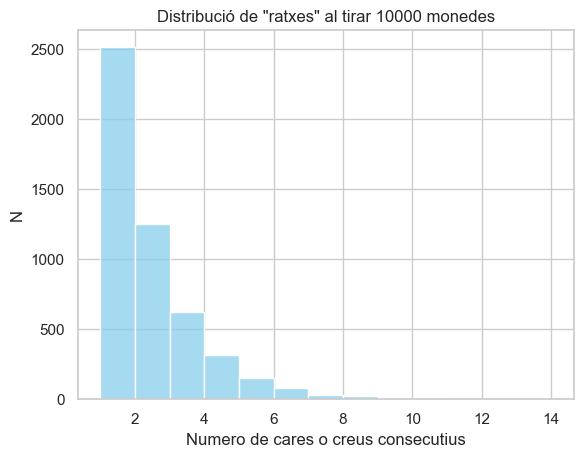

In [46]:
#Per l'histograma simularem les "ratxes" de al tirar una moneda

flips = rd.choices([0, 1], k=10000)
streaks = []

count = 1
for i in range(1, len(flips)):
    if flips[i] == flips[i - 1]:
        count += 1
    else:
        streaks.append(count)
        count = 1

streaks.append(count)

sns.set(style="whitegrid")

sns.histplot(streaks, bins=range(1, max(streaks) + 2), kde=False, color='skyblue')
plt.title('Distribució de \"ratxes\" al tirar 10000 monedes')
plt.xlabel('Numero de cares o creus consecutius')
plt.ylabel('N')
plt.show()


## Histogrames

### Definició: 

Choropleth Maps display divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable. This provides a way to visualise values over a geographical area, which can show variation or patterns across the displayed location.

The data variable uses colour progression to represent itself in each region of the map. Typically, this can be a blending from one colour to another, a single hue progression, transparent to opaque, light to dark or an entire colour spectrum.

One downside to the use of colour is that you can't accurately read or compare values from the map. Another issue is that larger regions appear more emphasised then smaller ones, so the viewer's perception of the shaded values are affected.

A common error when producing Choropleth Maps is to encode raw data values (such as population) rather than using normalized values (calculating population per square kilometre for example) to produce a density map.

https://datavizcatalogue.com/methods/choropleth.html

### Tipus de dades: 

Variables, normalitzades i indexades per països.

In [47]:
df = pd.read_csv("Country-data.csv")
df.head()

df["log_inflation"] = np.log10(df["inflation"] +1)


fig = px.choropleth(
    df,
    locations="iso_alpha",          
    color="log_inflation",                   
    hover_name="country",
    color_continuous_scale="Viridis",
    title="Log-Inflació per País"
)

fig.show()

#font: https://www.kaggle.com/datasets/manusmitajha/countrydatacsv

c:\Users\Pau\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



## Marimekko Chart
### Descripció
Marimekko Charts are used to visualise categorical data over a pair of variables. In a Marimekko Chart, both axes are variables with a percentage scale, that determines both the width and height of each segment. So Marimekko Charts work as a kind of two-way 100% Stacked Bar Graph. This makes it possible to detect relationships between categories and their subcategories via the two axes.

The main flaws of Marimekko Charts are that they can be hard to read, especially when there are many segments. Also, it’s hard to accurately make comparisons between each segment, as they are not all arranged next to each other along a common baseline. Therefore, Marimekko Charts are better suited for giving a more general overview of the data.

https://datavizcatalogue.com/methods/marimekko_chart.html

## Tipus de dades

Variables numèriques distribuida sobre variables categòriques

In [48]:
import numpy as np
import plotly.graph_objs as go
import pandas as pd

# Filter countries
countries = ["United States", "China", "Germany"]
df = df[df['country'].isin(countries)].copy()

# Calculate GDP share (width - sums to 100%)
df['gdp_estimate'] = df['gdpp'] * 100
total_gdp = df['gdp_estimate'].sum()
widths = (df['gdp_estimate'] / total_gdp * 100).values

# Calculate trade composition (height - sums to 100% per bar)
df['total_trade'] = df['imports'] + df['exports']
df['export_pct'] = (df['exports'] / df['total_trade']) * 100
df['import_pct'] = (df['imports'] / df['total_trade']) * 100

labels = df['country'].tolist()
data = {
    "Exports": df['export_pct'].tolist(),
    "Imports": df['import_pct'].tolist()
}

fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths, np.array(data[key])]),
        texttemplate="%{y:.1f}% of trade<br>(%{width:.1f}% GDP share)",
        textposition="inside",
        textfont_color="white",
        hovertemplate="<br>".join([
            "<b>%{customdata[0]}</b>",
            "GDP Share: %{customdata[1]:.1f}%",
            "%{fullData.name}: %{customdata[2]:.1f}% of trade",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext=["<b>%s</b><br>GDP Share: %.1f%%" % (l, w) for l, w in zip(labels, widths)],
    title="Countries (bar width = GDP share)"
)

fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,100], title="Trade Composition (%)")

fig.update_layout(
    title_text="Trade Balance: Imports vs Exports<br><sub>Width = GDP share, Height = % of country's trade</sub>",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

fig.show()

#https://levelup.gitconnected.com/how-to-build-a-marimekko-chart-in-python-7b26faf47889